# Pandas to study Academic Performance

To begin with, we install the necessary dependencies:

In [3]:
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


We import the necessary packages that we will use for graph plotting and statictics:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Dataset

Let's download the dataset and show what it contains:

In [22]:
df = pd.read_excel('dataset.xlsx')

In [23]:
print(df)

                   Subject  Year Mark          Field Denomination Repeated  \
0                 Calculus     1  7.5           Math      Notable       No   
1                  Physics     1  7.7        Physics      Notable       No   
2              Electronics     1  7.8        Physics      Notable       No   
3            Programming 1     1  7.2    Programming      Notable       No   
4            Discrete Math     1  7.7           Math      Notable       No   
5                  Algebra     1    8           Math      Notable       No   
6               Statistics     1  7.5           Math      Notable       No   
7                 Business     1  9.1          Extra  Outstanding       No   
8                      OOP     1  9.5    Programming  Outstanding       No   
9      Computer Technology     1   10       Hardware       Honors       No   
10              Algorithms     2   10    Programming       Honors       No   
11               Databases     2  8.7    Programming      Notabl

## Plotting Information

We can extract a lot of information from that dataset as well as infering different things. Let's start with plotting the marks over any year:

In [7]:
def choose_year(df, year:int, semester=None):
    if year < 1 or year > 4:
        return df
    start_row = (year - 1) * 10
    if semester is not None:
        start_row += (semester - 1) * 5
        end_row = start_row + 5
    else:
        end_row = start_row + 10
    df = df.iloc[start_row:end_row]
    return df

In [8]:
def marks_by_subject(df, type_graph="bars", year=0, semester=None):
    df_subset = choose_year(df, year, semester)

    x = df_subset["Subject"]
    y = pd.to_numeric(df_subset["Mark"], errors='coerce')
    fields = df_subset["Field"]

    unique_fields = fields.unique()
    colors = sns.color_palette("husl", len(unique_fields))  
    field_color_map = dict(zip(unique_fields, colors))
    bar_colors = fields.map(field_color_map)
    
    sns.set_style("darkgrid")
    plt.rcParams.update({
        "axes.facecolor": "#A8B8C5", 
        "figure.facecolor": "#141321",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
        "grid.color": "#555555"
    })

    fig, ax = plt.subplots(figsize=(30, 12))

    if(type_graph == "bars"):
        ax.bar(x, y, color=bar_colors)
        handles = [plt.Rectangle((0,0),1,1, color=field_color_map[field]) for field in unique_fields]
    elif(type_graph == "lines"):
        ax.plot(x, y, marker='o', linestyle='-', color='b', alpha=0.5)  
        for i, (subject, mark, color) in enumerate(zip(x, y, bar_colors)):
            ax.plot(subject, mark, marker='o', color=color, markersize=8)
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]

    ax.set_ylim(0, 10)
    ax.set_ylabel("Mark", fontsize=20)
    if year < 1 or year > 4:
        ax.set_title('Marks by Subject in the Degree', fontsize=24)
    else:
        if semester == None:
            ax.set_title('Marks by Subject Year ' + str(year), fontsize=24)
        else:
            ax.set_title('Marks by Subject Year ' + str(year) + ' and Semester ' + str(semester), fontsize=24)
    plt.xticks(rotation=45, ha='right', rotation_mode='default', fontsize=16)
    plt.yticks(fontsize=16)

    ax.legend(handles, unique_fields, title="Field", fontsize=16, title_fontsize='20')

    fig.tight_layout()
    plt.show()
    
    # fig.savefig("graph marks", dpi=300, bbox_inches='tight')
    # plt.close(fig)  # Close the figure to free up memory

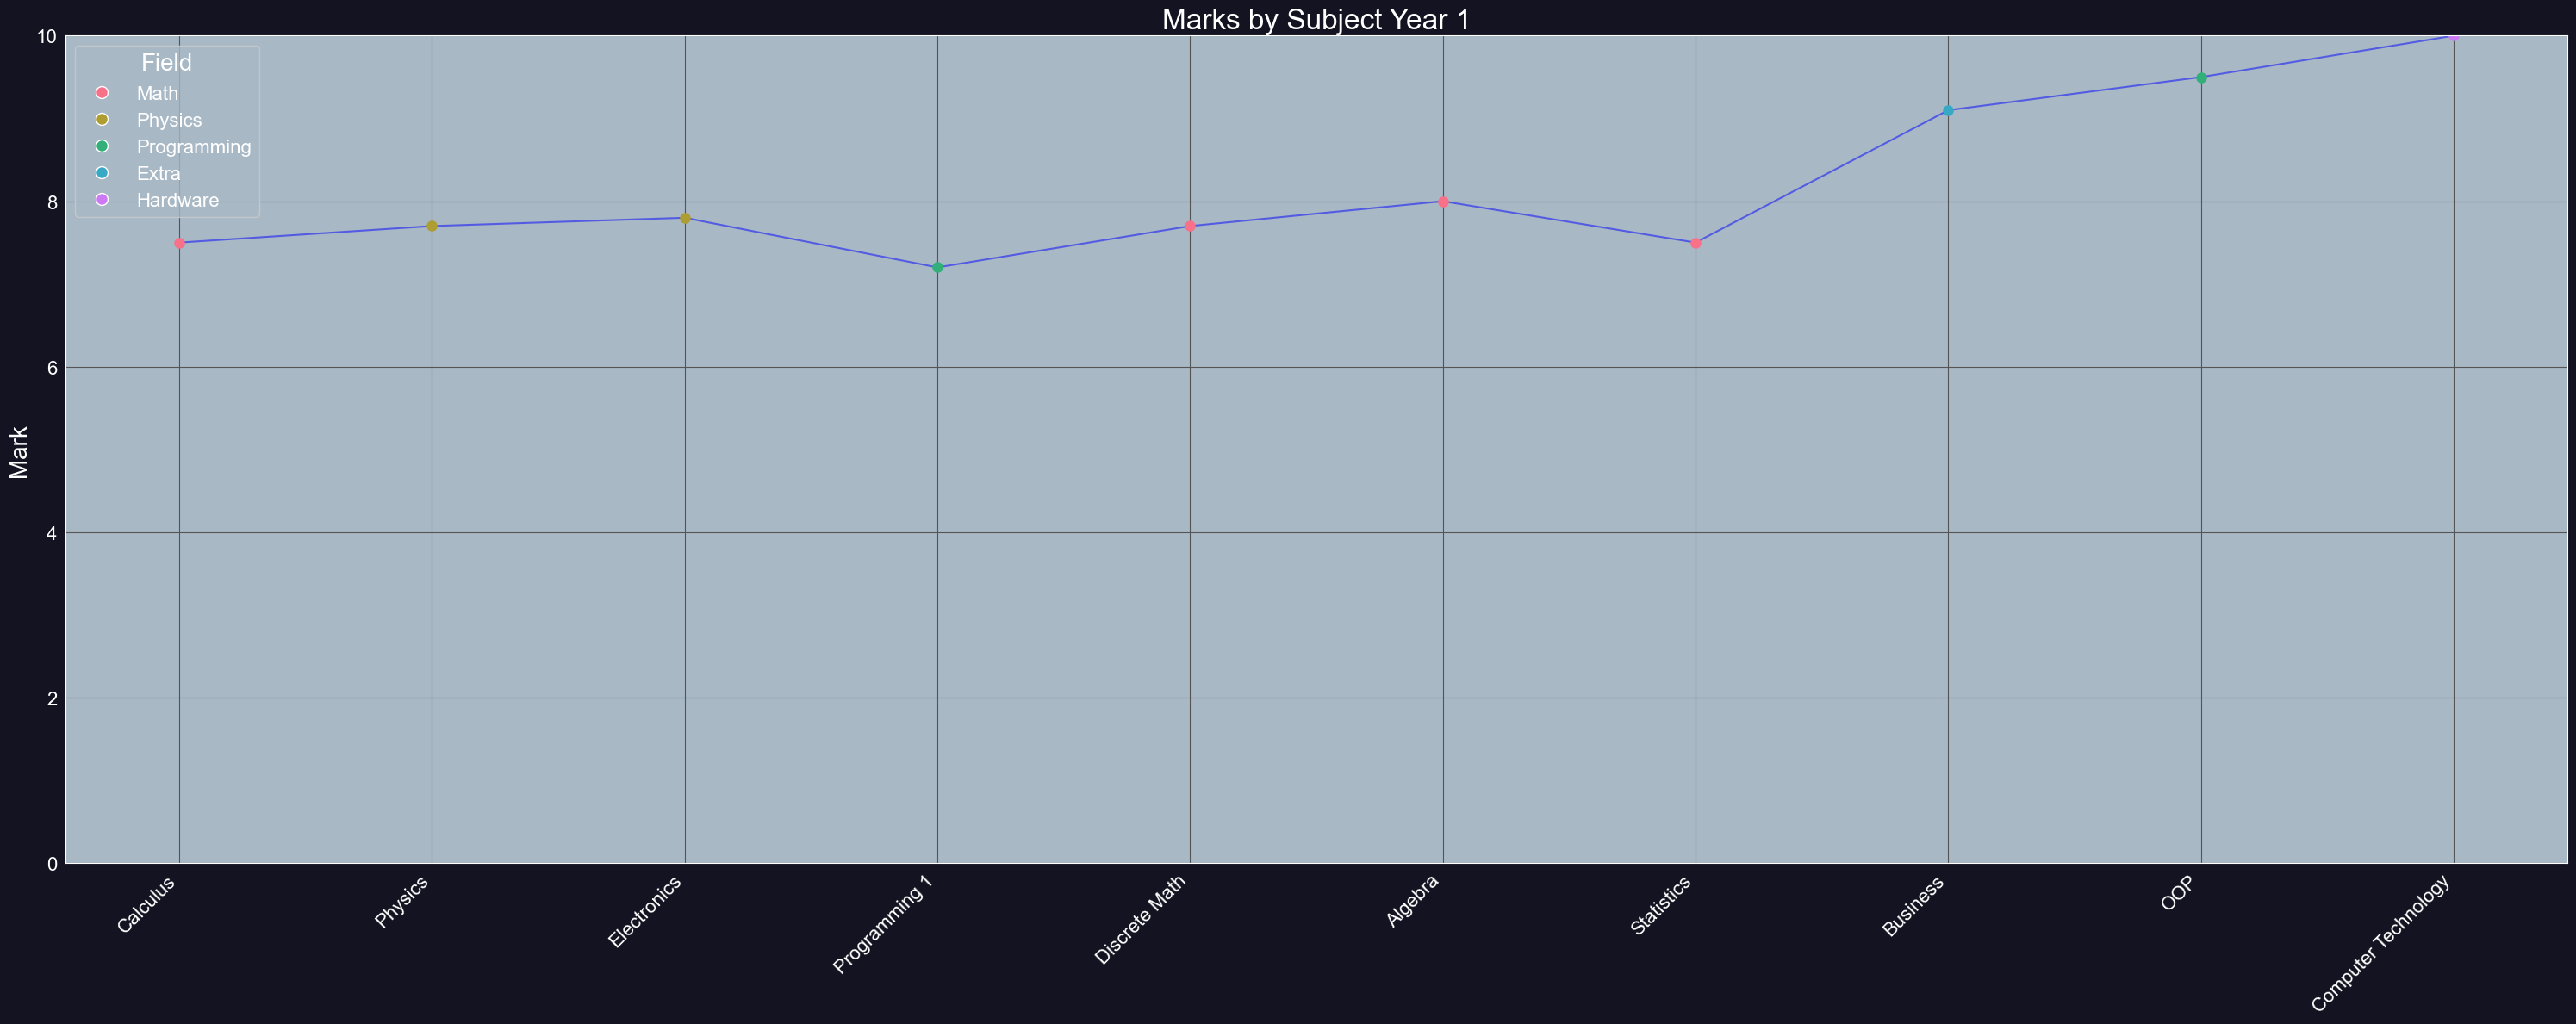

In [9]:
marks_by_subject(df, type_graph="lines", year=1)

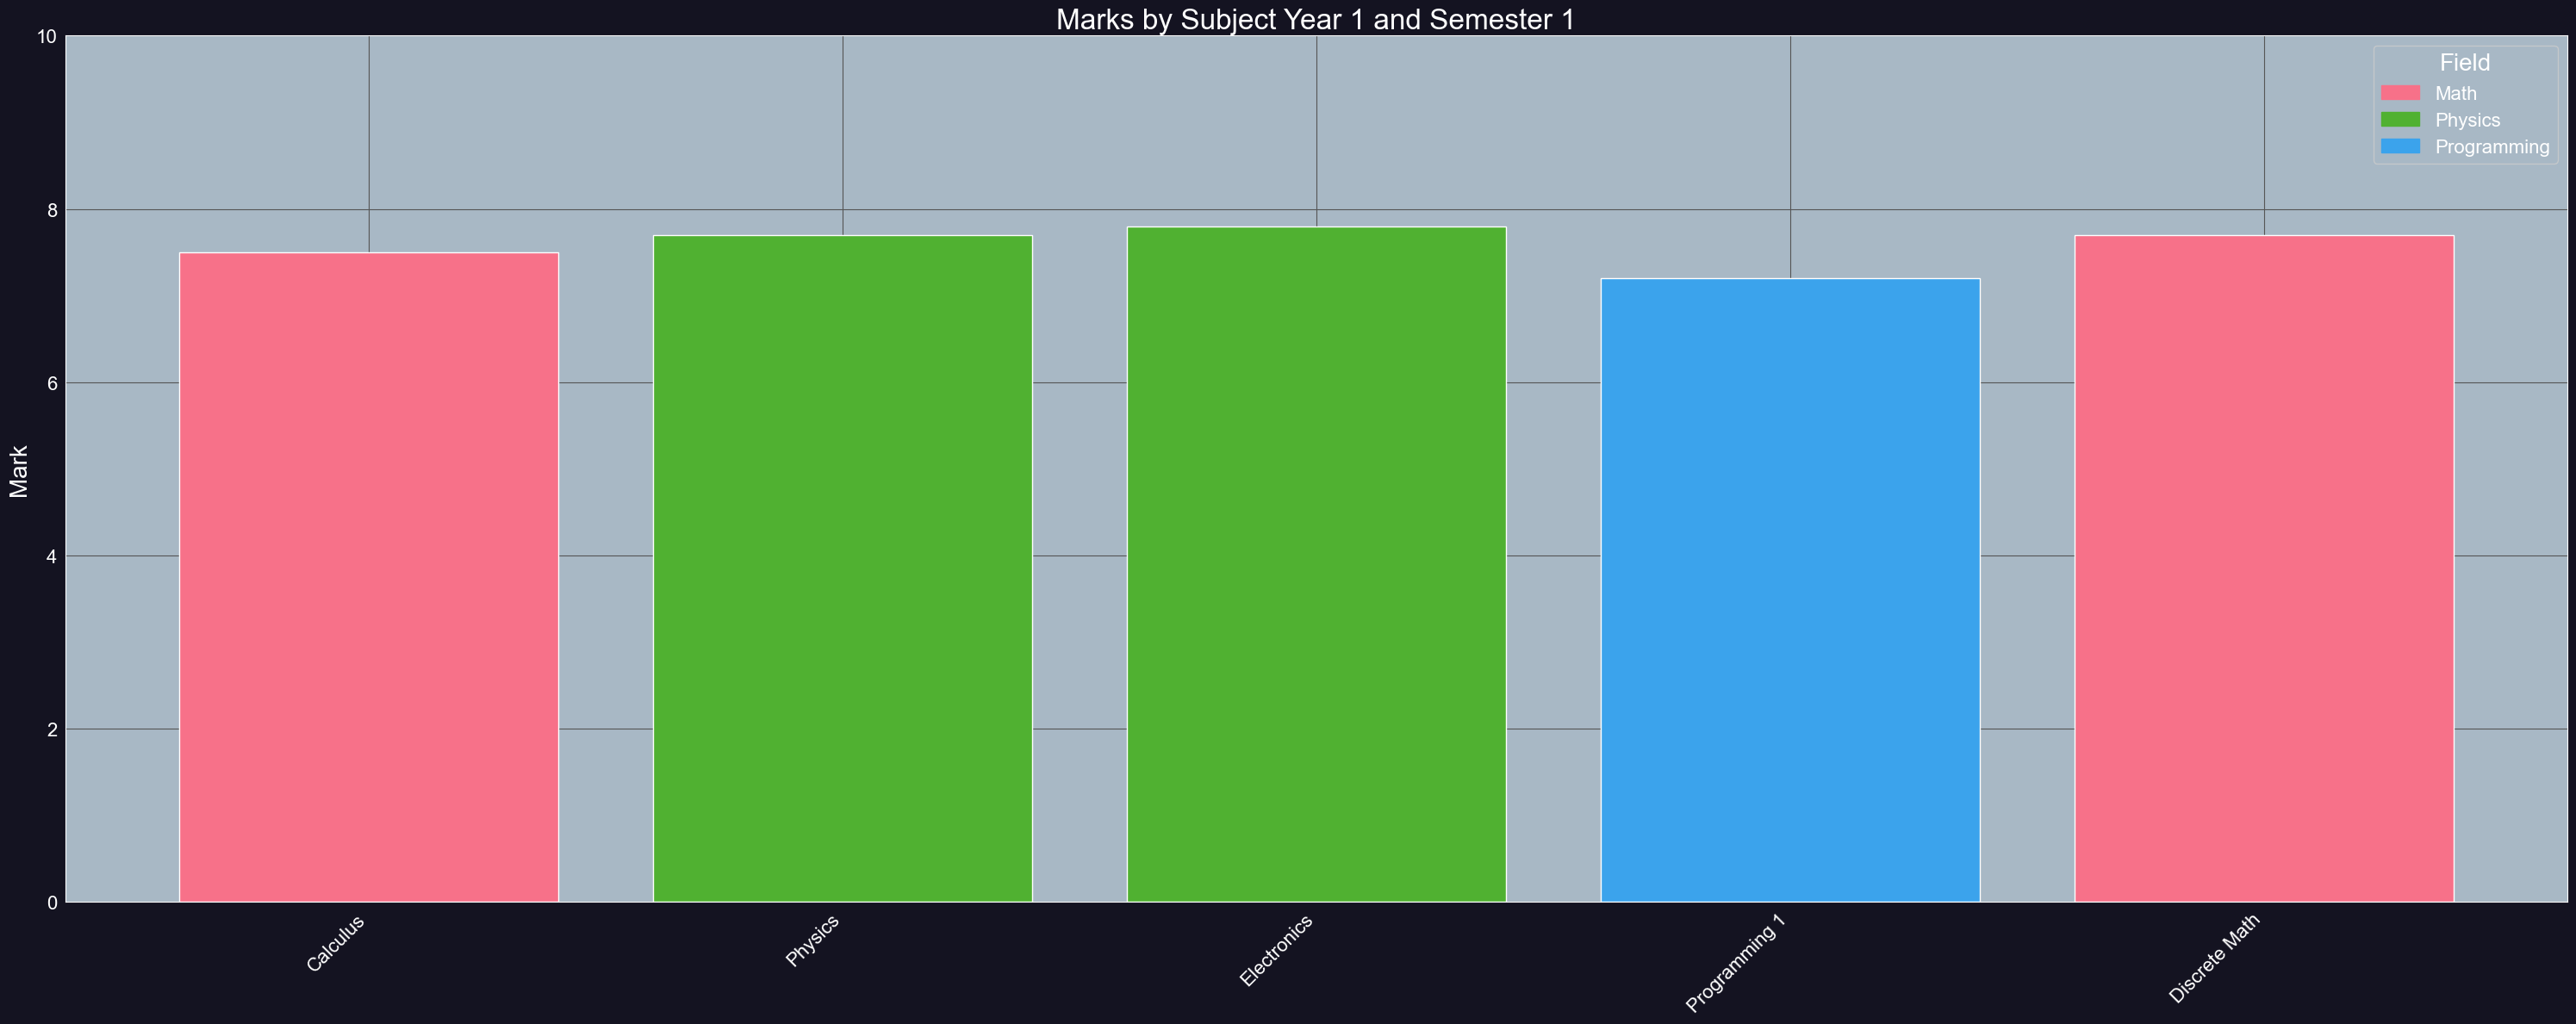

In [10]:
marks_by_subject(df, type_graph="bars", year=1, semester=1)

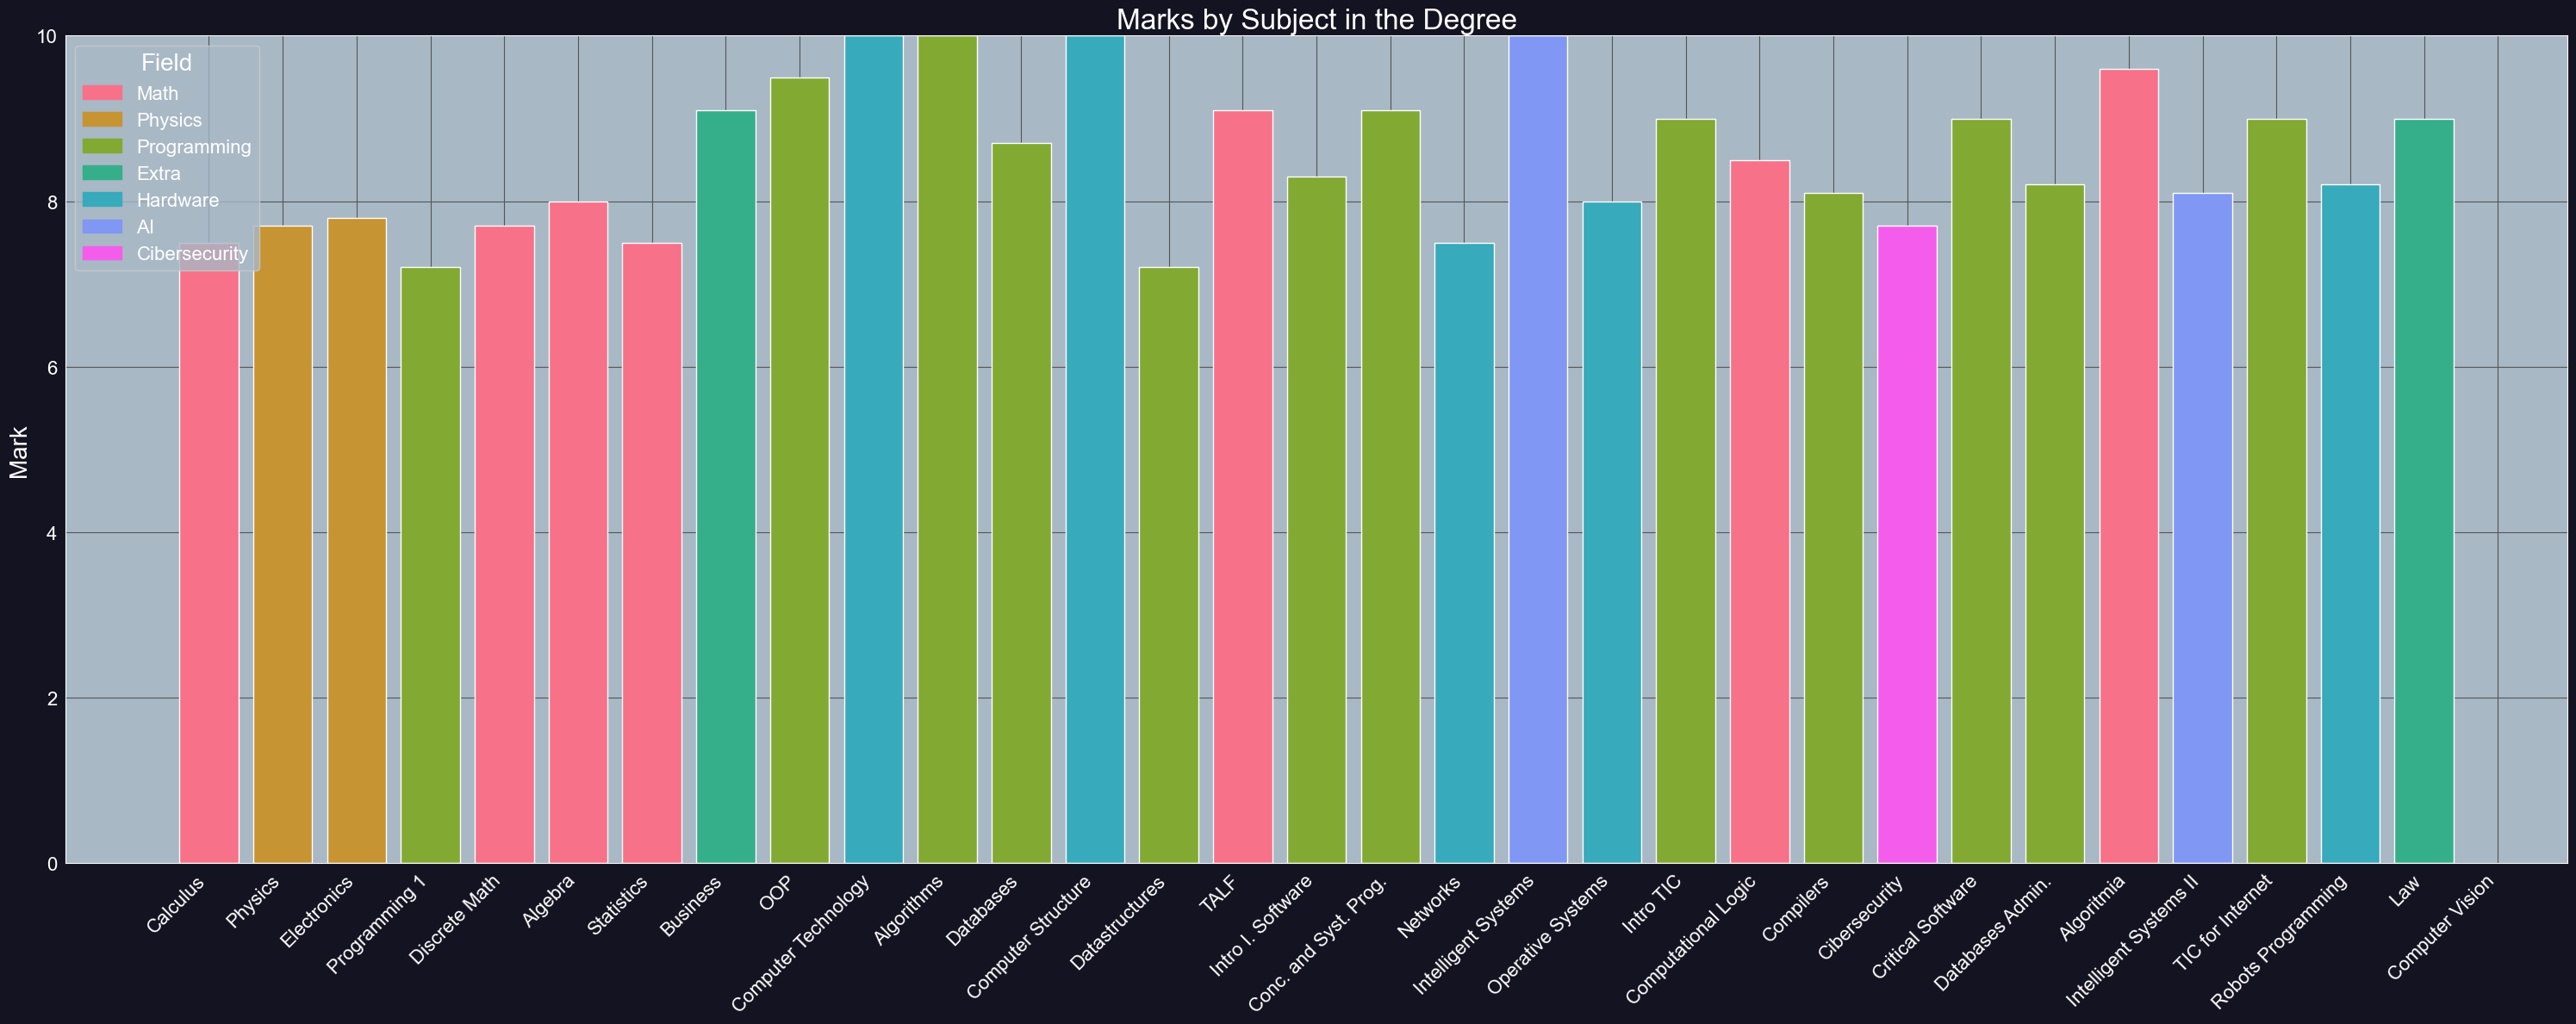

In [11]:
marks_by_subject(df, type_graph="bars")

Next thing we can create is a graph with the number of credits for each type of subject:

In [12]:
def credit_total_type(df):
    credits_by_type = df.groupby('Type')['Credits'].sum()

    sns.set_style("darkgrid")
    plt.rcParams.update({
        "axes.facecolor": "#A8B8C5", 
        "figure.facecolor": "#141321",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
        "grid.color": "#555555"
    })

    plt.figure(figsize=(10, 4))
    credits_by_type.plot(kind='bar', color='lightgreen')

    plt.title('Total Number of Credits per Subject Type')
    plt.xlabel('Type')
    plt.ylabel('Total Number of Credits')
    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    for i, v in enumerate(credits_by_type):
        plt.text(i, v + 1, f'{v}', ha='center', va='bottom')

    plt.show()

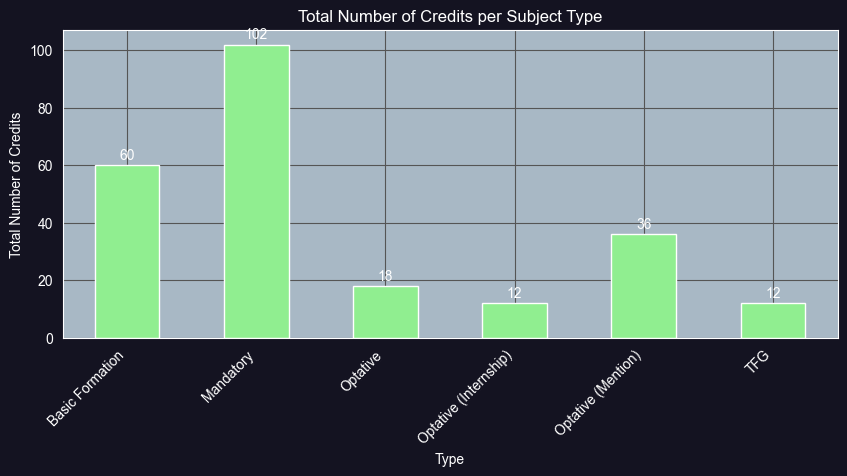

In [13]:
credit_total_type(df)

We can obtain a similar graph but the percentage of credits for each type of subject:

In [14]:
def credit_percentage_type(df):
    type_credits = df.groupby('Type')['Credits'].sum()

    total_credits = type_credits.sum()
    type_percentage = (type_credits / total_credits) * 100

    sns.set_style("darkgrid")
    plt.rcParams.update({
        "axes.facecolor": "#A8B8C5", 
        "figure.facecolor": "#A8B8C5",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
        "grid.color": "#555555"
    })

    plt.figure(figsize=(8, 8))
    pie_chart = type_percentage.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', labels=['']*len(type_percentage))

    plt.legend(pie_chart.patches, type_percentage.index, title="Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title('Credit Distribution in % by Type')
    plt.ylabel('') 
    plt.show()

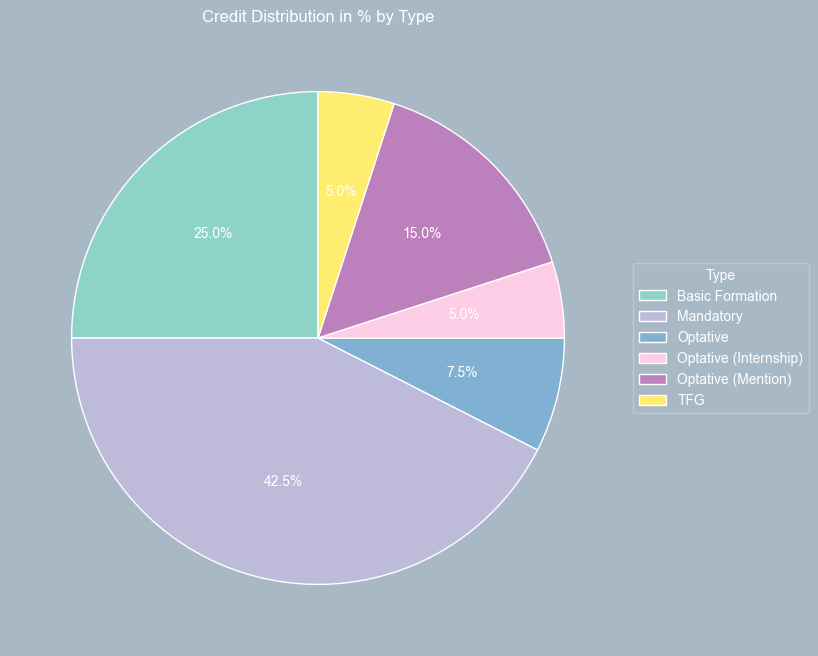

In [15]:
credit_percentage_type(df)

We can finally obtain the porcentage of credits passed for each type of subject:

In [16]:
def credit_passed_type(df):
    df_approved = df[df['Mark'] != '-']

    approved_credits_by_type = df_approved.groupby('Type')['Credits'].sum()
    total_credits_by_type = df.groupby('Type')['Credits'].sum()
    percentage_approved_credits = (approved_credits_by_type / total_credits_by_type) * 100

    sns.set_style("darkgrid")
    plt.rcParams.update({
        "axes.facecolor": "#A8B8C5", 
        "figure.facecolor": "#141321",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
        "grid.color": "#555555"
    })

    plt.figure(figsize=(10, 4))
    percentage_approved_credits.plot(kind='bar', color='skyblue')

    plt.title('% Distribution of Approved Credits by Type')
    plt.xlabel('Type')
    plt.ylabel('Approval % of Credits')

    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    for i, v in enumerate(percentage_approved_credits):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


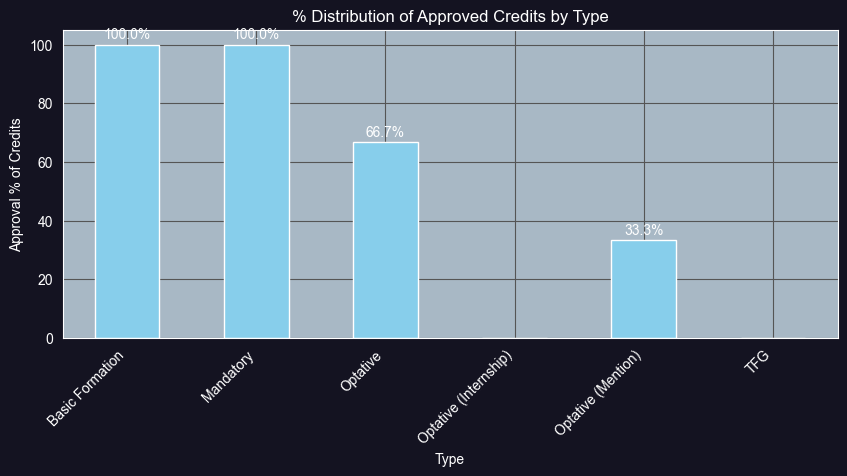

In [30]:
credit_passed_type(df)

Now we can create a graph that shows the % of credits obtained for each denomination:

In [28]:
def credit_percentage_denomination(df):
    type_credits = df.groupby('Denomination')['Credits'].sum()

    total_credits = type_credits.sum()
    type_percentage = (type_credits / total_credits) * 100

    sns.set_style("darkgrid")
    plt.rcParams.update({
        "axes.facecolor": "#A8B8C5", 
        "figure.facecolor": "#A8B8C5",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
        "grid.color": "#555555"
    })

    plt.figure(figsize=(8, 8))
    pie_chart = type_percentage.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', labels=['']*len(type_percentage))

    plt.legend(pie_chart.patches, type_percentage.index, title="Denomination", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title('Credit Distribution in % by Type')
    plt.ylabel('') 
    plt.show()

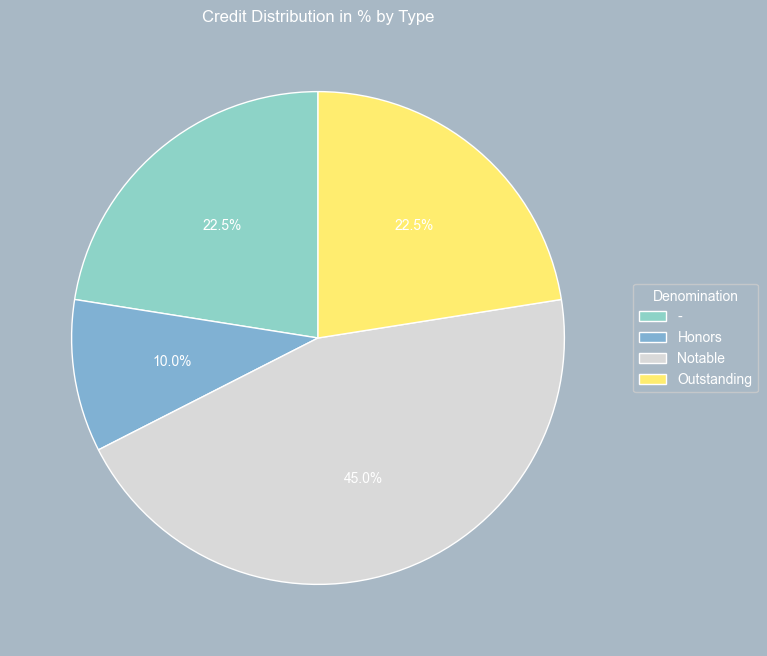

In [29]:
credit_percentage_denomination(df)

## Different Metrics

Let's start obtaining the arithmetic average mark in each year and in the whole degree:

In [73]:
def mean_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mean_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mean()
    return mean_column

In [74]:
mean_year1 = mean_year(df, 1)
mean_year2 = mean_year(df, 2)
mean_year3 = mean_year(df, 3)
mean_year4 = mean_year(df, 4)
means = [mean_year1, mean_year2, mean_year3, mean_year4]
mean_expedient = pd.to_numeric(df['Mark'], errors='coerce').mean()

In [75]:
for i in range(len(means)):
    print(f"The average mark in year {i+1} was {means[i]:.2f}")

print(f"My GPA was {mean_expedient:.3f} = {mean_expedient:.2f}")

The average mark in year 1 was 8.20
The average mark in year 2 was 8.79
The average mark in year 3 was 8.54
The average mark in year 4 was 9.00
My GPA was 8.526 = 8.53


Let's do the same with the median:

In [76]:
def median_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    median_column = pd.to_numeric(df_subset['Mark'], errors='coerce').median()
    return median_column

In [77]:
median_year1 = median_year(df, 1)
median_year2 = median_year(df, 2)
median_year3 = median_year(df, 3)
median_year4 = median_year(df, 4)
medians = [median_year1, median_year2, median_year3, median_year4]
median_expedient = pd.to_numeric(df['Mark'], errors='coerce').median()

In [78]:
for i in range(len(medians)):
    print(f"The median mark in year {i+1} was {medians[i]:.2f}")

print(f"The median of my expedient was {median_expedient:.3f} = {median_expedient:.2f}")

The median mark in year 1 was 7.75
The median mark in year 2 was 8.90
The median mark in year 3 was 8.35
The median mark in year 4 was 9.00
The median of my expedient was 8.300 = 8.30


Let's do the same with the mode:

In [79]:
def mode_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mode_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mode()
    return mode_column

In [80]:
mode_year1 = mode_year(df, 1)
mode_year2 = mode_year(df, 2)
mode_year3 = mode_year(df, 3)
mode_year4 = mode_year(df, 4)
modes = [mode_year1, mode_year2, mode_year3, mode_year4]
mode_expedient = pd.to_numeric(df['Mark'], errors='coerce').mode()

In [81]:
for i in range(len(modes)):
    if len(modes[i]) == 1:
        print(f"The mode mark in year {i+1} was {modes[i][0]:.2f}")
    else:
        rounded_modes = [f"{mark:.2f}" for mark in modes[i]]
        print('The mode marks in year ' + str(i+1) + ' were ' + ', '.join(rounded_modes[:-1]) + ' y ' + rounded_modes[-1])

if len(mode_expedient) == 1:
    print(f"The mode of my expedient was {mode_expedient[0]:.2f}")
else:
    rounded_expedient = [f"{mark:.2f}" for mark in mode_expedient]
    print('The modes of my expedient were ' + ', '.join(rounded_expedient[:-1]) + ' y ' + rounded_expedient[-1])

The mode marks in year 1 were 7.50 y 7.70
The mode mark in year 2 was 10.00
The mode mark in year 3 was 9.00
The mode mark in year 4 was 9.00
The modes of my expedient were 9.00 y 10.00
